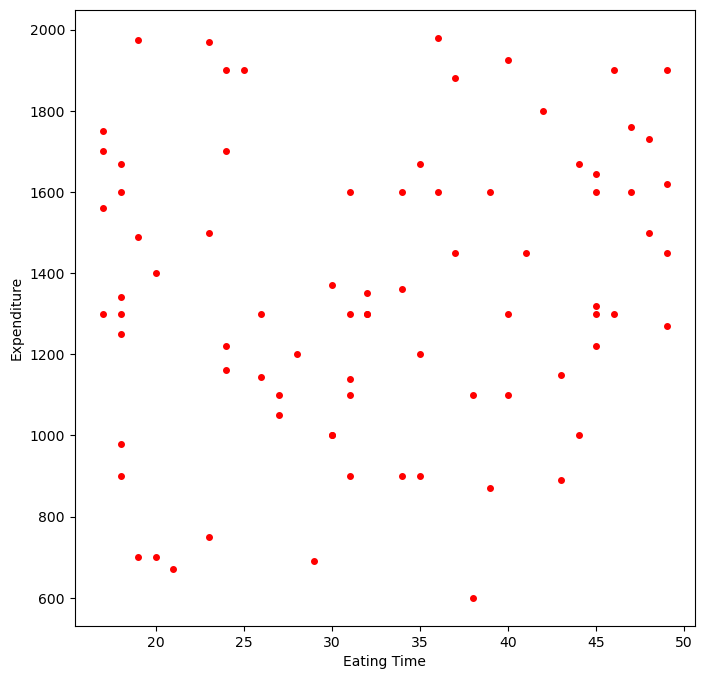

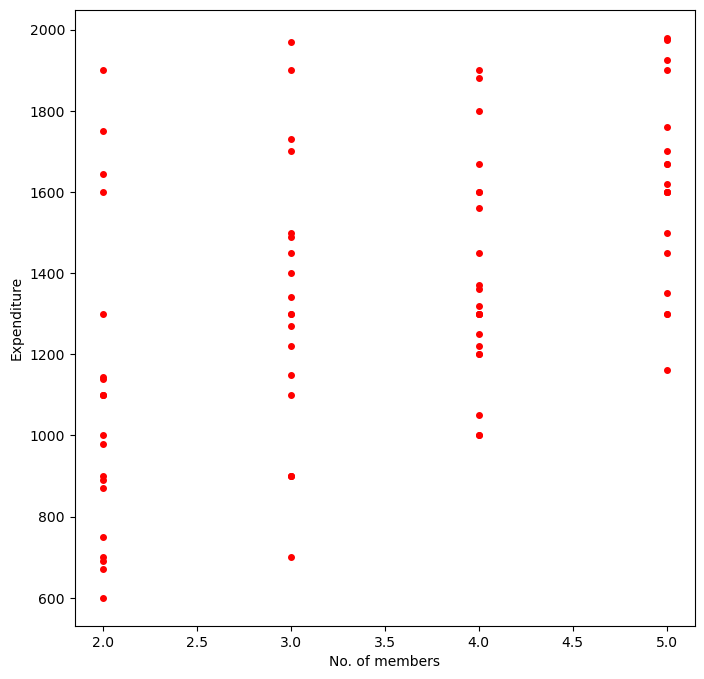

                            OLS Regression Results                            
Dep. Variable:                Exp-USD   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     13.88
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           7.12e-06
Time:                        08:01:35   Log-Likelihood:                -570.65
No. Observations:                  80   AIC:                             1147.
Df Residuals:                      77   BIC:                             1154.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        715.3355    146.953      4.868      0.0

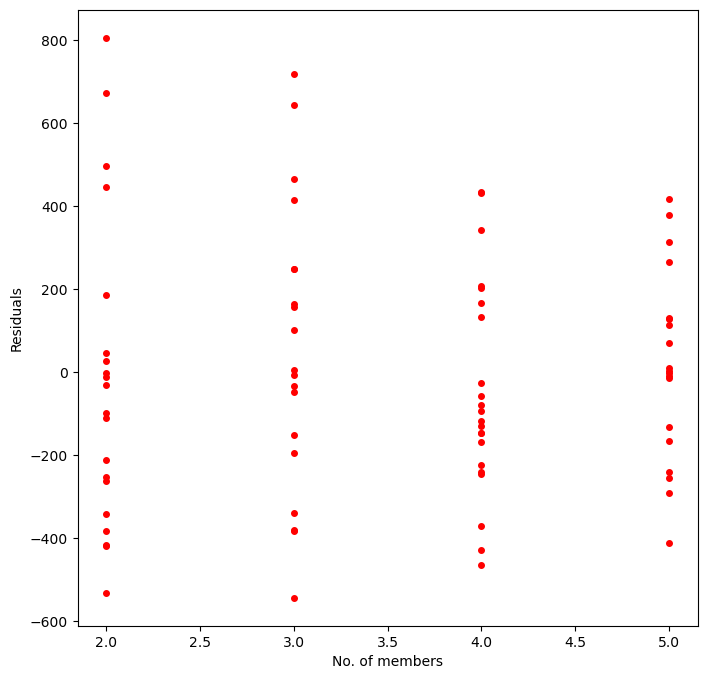

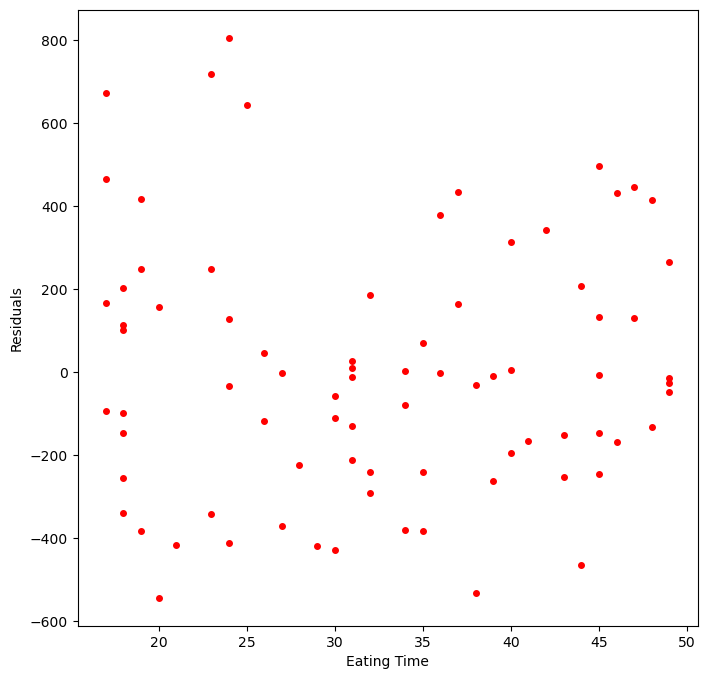

[('Lagrange multiplier statistic', np.float64(7.812132534749585)), ('p-value', np.float64(0.020119490293937604)), ('f-value', np.float64(4.166449476189909)), ('f p-value', np.float64(0.019138490230340494))]


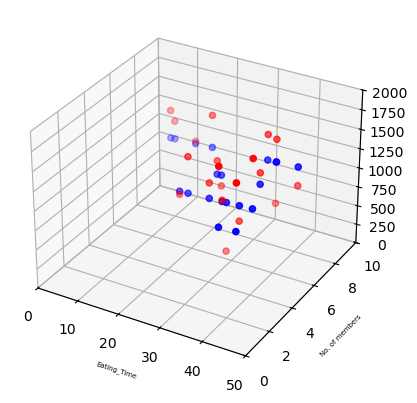

RMSE: 378.4872466092184
1632.428373509236
1130.4669274648681
48
18
1980
670
5
2


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May  8 10:08:15 2025

@author: aneek
"""

import numpy as np
import os
import pandas as pd
from sklearn.metrics import mean_squared_error
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
pd.set_option('display.max_column',None)
from mpl_toolkits import mplot3d
file_p='C:\\Users\\aneek\\My Drive\\data\\eat_time2.xlsx'
d1=pd.read_excel(file_p)
d1=sm.add_constant(d1)
X=d1[['const','Eat_time','Fam_num']]
Y=d1[['Exp-USD']]
fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(X['Eat_time'],Y['Exp-USD'],s=16,color='red')
plt.xlabel('Eating Time')
plt.ylabel('Expenditure')
plt.show()
fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(X['Fam_num'],Y['Exp-USD'],s=16,color='red')
plt.xlabel('No. of members')
plt.ylabel('Expenditure')
plt.show()
model1=sm.OLS(Y,X).fit()
print(model1.summary())
fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(X['Fam_num'],model1.resid,s=16,color='red')
plt.xlabel('No. of members')
plt.ylabel('Residuals')
plt.show()
fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(X['Eat_time'],model1.resid,s=16,color='red')
plt.xlabel('Eating Time')
plt.ylabel('Residuals')
plt.show()
resi=model1.resid
test_result = sms.het_breuschpagan(model1.resid, model1.model.exog, robust=True)
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
print(list(lzip(names, test_result)))
file_p='C:\\Users\\aneek\\My Drive\\data\\eat_time_test.xlsx'
d2=pd.read_excel(file_p)
d2=sm.add_constant(d2)
X2=d2[['const','Eat_time','Fam_num']]
Y2=d2[['Exp-USD']]
Y_fit=model1.predict(X2)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_xlim(0,50) #for Eating Time
ax.set_ylim(0,10) #for Fam-Num
ax.set_zlim(0,2000) #for Expenditure
x=d2['Eat_time'] 
y=d2['Fam_num']
z=Y2['Exp-USD'] #actual values
z1=Y_fit #predicted values
ax.scatter(x, y, z, color='red')
x1=d2['Eat_time']
y1=d2['Fam_num']
ax.scatter(x1, y1, z1, color='blue')
ax.set_xlabel('Eating_Time',size=5)
ax.set_ylabel('No. of members',size=5)
plt.show()    
mse=mean_squared_error(Y2['Exp-USD'],Y_fit)
rmse=np.sqrt(mse)
print(f"RMSE: {rmse}")
print(np.max(Y_fit)) #for predicted value
print(np.min(Y_fit))
print(np.max(d2['Eat_time']))
print(np.min(d2['Eat_time']))
print(np.max(d2['Exp-USD'])) #for actual values
print(np.min(d2['Exp-USD']))
print(np.max(d2['Fam_num']))
print(np.min(d2['Fam_num']))